# Titanic Dataset

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

# Data loading

In [22]:
df = pd.read_csv('titanic.csv')

Untuk menload dataset yang berformat csv dapat menggunakan fungsi read_csv

In [23]:
# Melihat Data teratas dari dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

pengantar

Pada tanggal 15 April 1912, Titanic menabrak gunung es dan lebih dari 1.500 orang meninggal dari 2.224 penumpang dan awaknya. Dalam eksplorasi ini akan dianalisis dataset Titanic dengan setiap baris mewakili satu orang / penumpang. Kemudian, kolom tersebut menjelaskan atribut penumpang seperti apakah mereka selamat, usia mereka, kelas ekonomi mereka, jenis kelamin mereka, ongkos yang dibayarkan, jumlah keluarga mereka (saudara / pasangan / orang tua / anak, tiket, kabin dan keberangkatan pelabuhan mereka). .

Fitur data :
1. Survived : status keselamatan penumpang (0 = not survived, 1 = survived)
2. Pcalss   : kelas tiket (1,2,3)
3. Name     : nama penumpang
4. Sex      : jens kelamin penumpang
5. Age      : umur penumpang dalam tahun
6. SibSp    : saudara kandung / pasangan di kapal titanic
7. parch    : orang tua / anak-anak di kapal titanic
8. Ticket   : nomor tiket
9. Fare     : tarif
10. Cabin   : nomor cabin
11. Emnacked: pelabuhan keberangkatan (C = Cherbourg, Q = Queenstown, S = Southampton)

In [24]:
print("Total rows\t\t: ", df.shape[0])
print("Total cols\t\t: ", df.shape[1])
print("Total missing values\t: ", df.isnull().sum().sum())

Total rows		:  891
Total cols		:  12
Total missing values	:  866


Jika diperhatikan, cukup banyak missing values.

Untuk lebih jelasnya jika dapat menggunakan fungsi info()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [26]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Terdapat missing values dari feature age dan Cabin dengan jumlah yang cukup banyak, jika dilakukan penghapusan makan data menjadi berkurang dan dapat mengurangi akurasi.

### Menambahkan nilai pada missing values kolom age

Untuk menambahkan nilai age kita gunakan rata-rata modus. Bisa juga menggunakan median

In [31]:
df['Age'] = df['Age'].fillna(df['Age'].mode()[0])

In [32]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Untuk mengisi feature Cabin dan embarked kita mengetahui isi dari kedua feature tersebut

In [33]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Kita tidak dapat melakukan pengisian seperti pada feature age

In [34]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

Untuk feature Embarked dan Cabin kita dapat mengisi dengan modus data

In [35]:
cols = ['Cabin', 'Embarked']
for col in cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [36]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


## Melihat Korelasi antar feature

In [38]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036186,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.052872,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.356187,0.083081,0.018443,-0.549500
Age,0.036186,-0.052872,-0.356187,1.000000,-0.232411,-0.155118,0.107554
SibSp,-0.057527,-0.035322,0.083081,-0.232411,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.155118,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.107554,0.159651,0.216225,1.000000


### Korelasi Feature lain dengan survived

In [39]:
df.corr()['Survived'].to_frame()

,Survived
PassengerId,-0.005007
Survived,1.000000
Pclass,-0.338481
Age,-0.052872
SibSp,-0.035322
Parch,0.081629
Fare,0.257307


Secara statistik tidak benar-benar ada feature yang berpengaruh terhadap keselamatan 

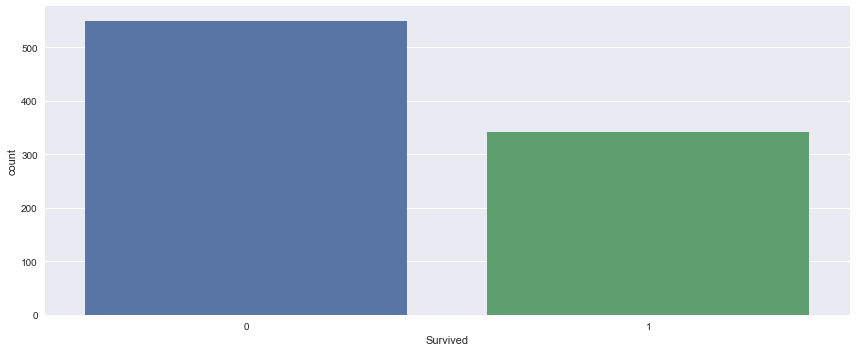

In [40]:
plt.figure(figsize=(12,5))
sns.countplot(x='Survived', data=df)
plt.tight_layout()
plt.show()

Berdasarkan grafik pada lebih banyak penumpang yang tidak selamat

jika berdasarkan gender manakah yang lebih banyak survived ?

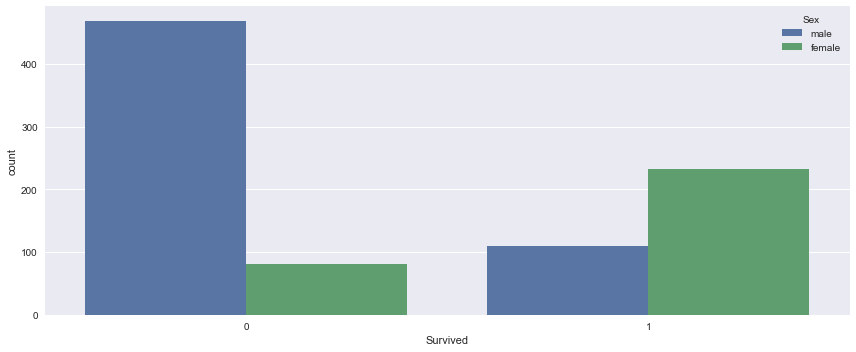

In [41]:
plt.figure(figsize=(12,5))
sns.countplot(x='Survived', hue='Sex', data=df)
plt.tight_layout()
plt.show()

Berdasarkan grafik laki-laki lebih banyak yang tidak surviveddibandingkan perempuan

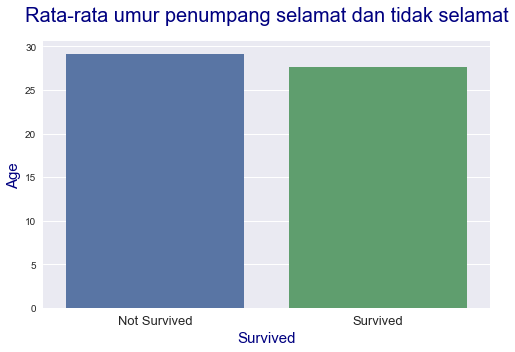

In [42]:
plt.figure(figsize=(7,5))
sns.barplot(x=df['Survived'].unique(), y=df.groupby(['Survived'])['Age'].mean())
plt.title("Rata-rata umur penumpang selamat dan tidak selamat", pad=20, size=20, color='navy')
plt.xlabel('Survived', size=15, color='navy')
plt.ylabel('Age', size=15, color='navy')
label = ['Not Survived', 'Survived']
plt.xticks(range(len(label)), label, size=13)
plt.tight_layout()
plt.show()

Jika berdasarkan pclass bagaimana status survived dan not survived ?

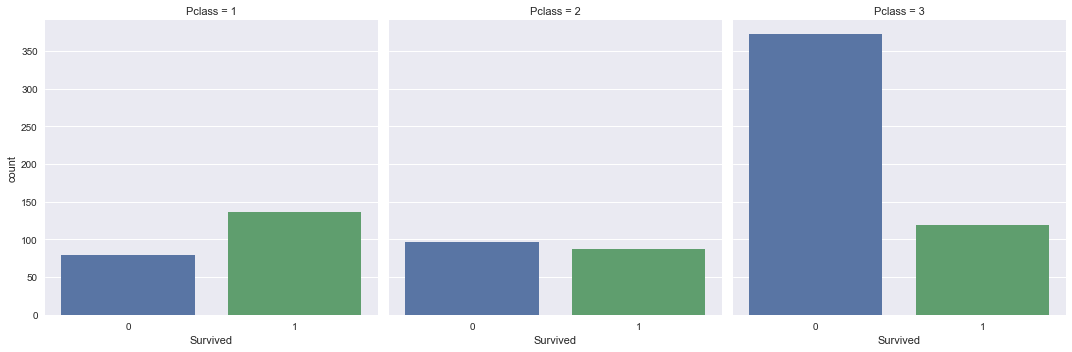

In [43]:
sns.catplot(x='Survived', col='Pclass', data=df, kind='count')
plt.tight_layout()
plt.show()

Berdasarkan grafik pada pclass 3 banyak penumpang yang tidak selamat

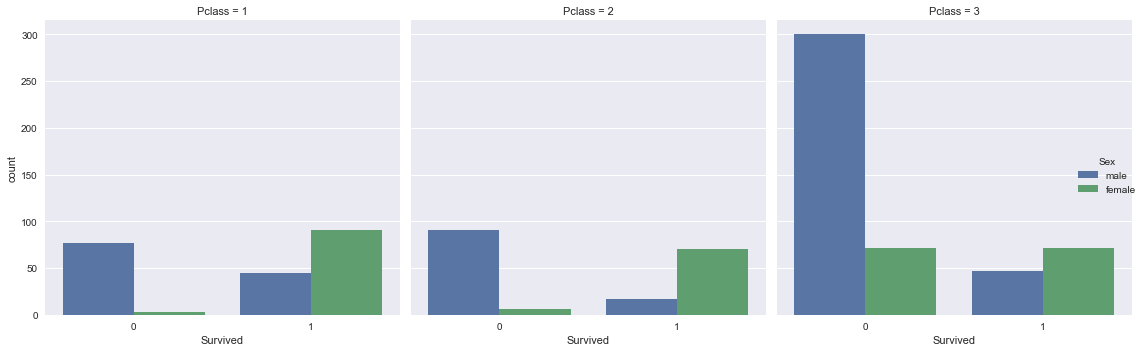

In [44]:
sns.catplot(x='Survived', col='Pclass',hue='Sex', data=df, kind='count')
plt.tight_layout()
plt.show()

Jika lihat lebih spesifik lagi, pada pclass 3 laki-laki menjadi penumpang paling banyak yang tidak survived

In [46]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


#### Melihat Unique values dari Embarked

In [59]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

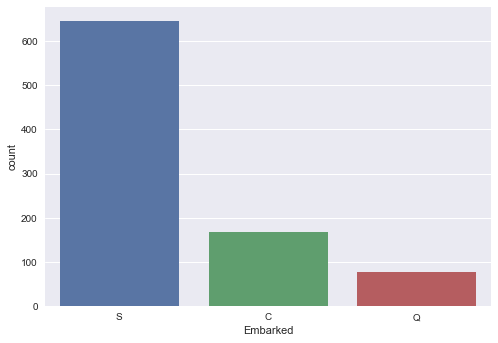

In [61]:
sns.countplot(x='Embarked', data=df)

Data menunjukan penumpang lebih banyak berangkat dari pelabuhan Southampton

Bagaimana subungan antara survived dengan embarked ?

In [62]:
df.groupby(['Embarked','Survived'])['Survived'].count().to_frame()

Survived
Embarked Survived          
C        0               75
         1               93
Q        0               47
         1               30
S        0              427
         1              219

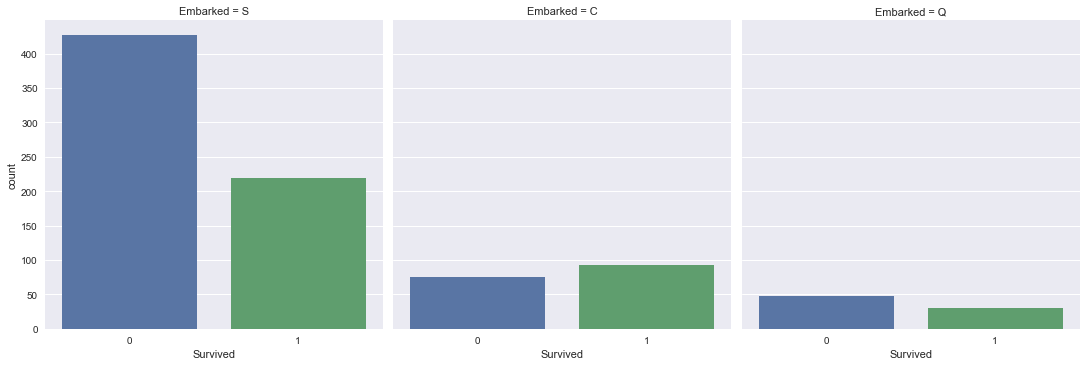

In [63]:
sns.catplot(x='Survived',col='Embarked',data=df, kind='count')
plt.show()

Berdasarkan grafik, Penumpang yang melakukan keberangkatan dari Cherbourg memiliki perbandingan survived lebih banyak dari not survived ketimbang yang lain

Melihat lebih dalam dengan

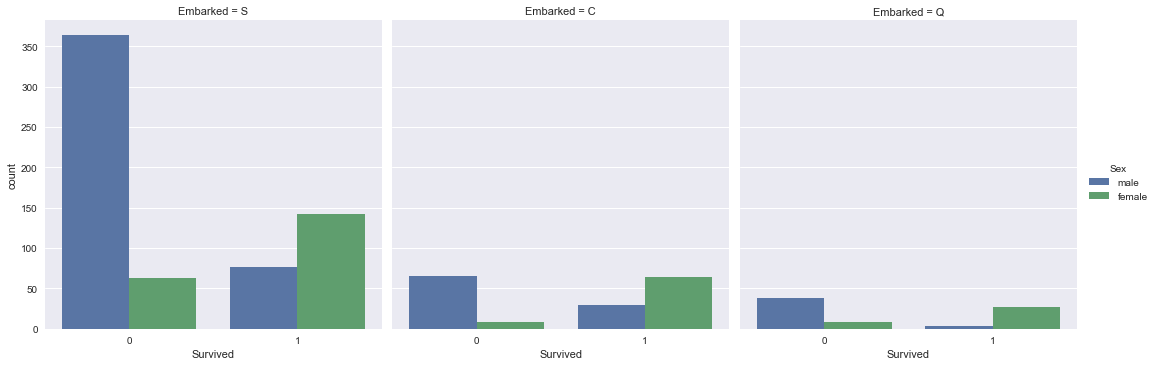

In [64]:
sns.catplot(x='Survived',col='Embarked',hue='Sex',data=df, kind='count')
plt.show()

In [66]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)